<h2 style="text-align:center">Proyecto 2</h2>

### **Integrantes**:

Daniela Donado <br>
Carmen Samaniego<br>
Sofia Marcano<br>
Dummar Londoño

***

### Importaciones

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import jarque_bera
import statsmodels.api as sm 
from statsmodels.stats.stattools import durbin_watson 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

***

# Parte 1. Regresión (50%)

Carga del archivo

In [ ]:
data = pd.read_csv("FLIR_groups1and2.csv", skiprows=2, delimiter=";")
data.drop(columns=['SubjectID', 'Gender', 'Ethnicity', 'Cosmetics', 'Time', 'Date', 'Age'], inplace=True)

Realizamos un promedio de las variables numéricas para las 4 rondas y lo guardamos en un nuevo dataframe. 

In [99]:
variables_rondas = {}

for col in data.columns:
    if col.endswith("_1") or col.endswith("_2") or col.endswith("_3") or col.endswith("_4"):
        base = col[:-2]  
        variables_rondas.setdefault(base, []).append(col)
    
    elif col[-1] in ["1", "2", "3", "4"] and col[-2] != "_":
        base = col[:-1] 
        variables_rondas.setdefault(base, []).append(col)
 
df_prom = pd.DataFrame()

for base, cols in variables_rondas.items():
    df_prom[base + "_avg"] = data[cols].mean(axis=1)

print("Variables promediadas encontradas:", len(df_prom.columns))
df_prom

Variables promediadas encontradas: 30


,Unnamed: _avg,T_offset_avg,Max1R13_avg,Max1L13_avg,aveAllR13_avg,aveAllL13_avg,T_RC_avg,T_RC_Dry_avg,T_RC_Wet_avg,T_RC_Max_avg,...,T_FHLC_avg,T_FHBC_avg,T_FHTC_avg,T_FH_Max_avg,T_FHC_Max_avg,T_Max_avg,T_OR_avg,T_OR_Max_avg,T_LC1_avg,Unnamed: 11_avg
0,NaN,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,...,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,35.39,NaN
1,NaN,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,...,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,34.55,NaN
2,NaN,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,...,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,35.60,NaN
3,NaN,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,...,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,35.68,NaN
4,NaN,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,...,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,35.69,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,NaN,1.2225,35.6425,35.6525,34.8575,35.0050,35.7525,35.6575,35.7375,35.7750,...,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,35.84,NaN
1016,NaN,1.4675,35.9825,35.7575,35.4275,35.1975,35.9700,35.9500,35.8625,36.0075,...,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,35.78,NaN
1017,NaN,0.1300,36.4075,36.3400,35.8700,35.9600,36.4100,36.3625,36.3650,36.4475,...,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,36.43,NaN
1018,NaN,1.2450,35.8150,35.5250,34.2950,34.0100,35.7700,35.6850,35.7550,35.8150,...,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,NaN,NaN


Añade las variales aveOralF y aveOralM pues estas son las posibles variables de interés

In [100]:
for col in ["aveOralF", "aveOralM"]:
    if col in data.columns:
        df_prom[col] = data[col]

Se eliminan columnas con NaN

In [101]:
df_prom_limpio = df_prom.dropna(axis=1, how='all')  
df_prom_limpio = df_prom_limpio.dropna()            
df_prom_limpio

,T_offset_avg,Max1R13_avg,Max1L13_avg,aveAllR13_avg,aveAllL13_avg,T_RC_avg,T_RC_Dry_avg,T_RC_Wet_avg,T_RC_Max_avg,T_LC_avg,...,T_FHBC_avg,T_FHTC_avg,T_FH_Max_avg,T_FHC_Max_avg,T_Max_avg,T_OR_avg,T_OR_Max_avg,T_LC1_avg,aveOralF,aveOralM
0,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.320000,...,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,35.39,36.85,36.59
1,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.563333,...,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,34.55,37.00,37.19
2,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.470000,...,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,35.60,37.20,37.34
3,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.566667,...,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,35.68,36.85,37.09
4,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.623333,...,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,35.69,36.80,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1.1775,36.1125,36.1150,35.1200,35.3750,36.1100,36.0875,36.0750,36.1450,36.110000,...,34.9950,35.3700,35.9300,35.9300,36.4375,36.3975,36.4375,36.23,36.95,36.99
1015,1.2225,35.6425,35.6525,34.8575,35.0050,35.7525,35.6575,35.7375,35.7750,35.790000,...,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,35.84,36.95,36.99
1016,1.4675,35.9825,35.7575,35.4275,35.1975,35.9700,35.9500,35.8625,36.0075,35.840000,...,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,35.78,37.25,37.19
1017,0.1300,36.4075,36.3400,35.8700,35.9600,36.4100,36.3625,36.3650,36.4475,36.260000,...,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,36.43,37.35,37.59


Matriz de correlación

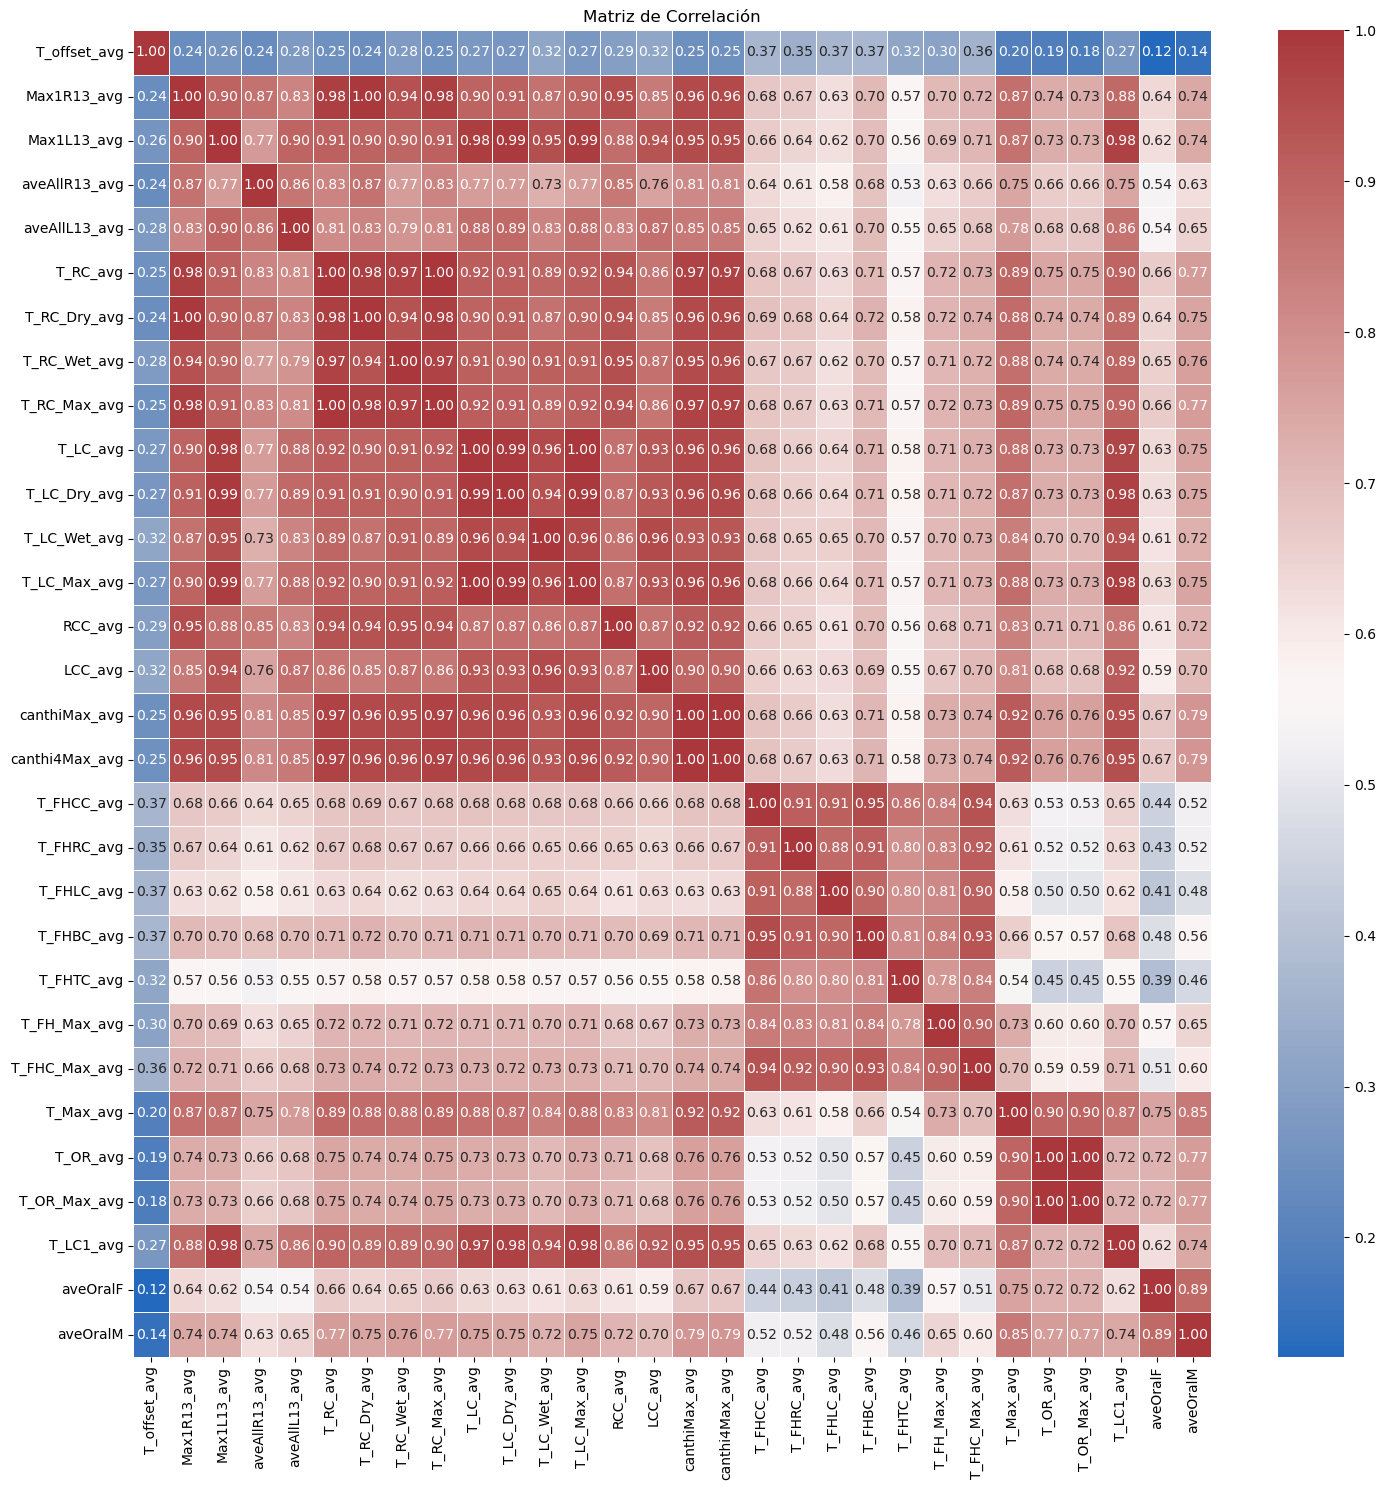

In [ ]:
corr_matrix = df_prom_limpio.corr()
plt.figure(figsize=(15, 15))
plt.title("Matriz de Correlación")
sns.heatmap(abs(corr_matrix.values), cmap='vlag', fmt=".2f", linewidths=0.5,xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)
plt.tight_layout()

Debido a que la matriz de correlación es muy grande, utilizamos el siguiente código para determinar las variables más correlacionadas con aveOralM.

Elegimos **aveOralM** ya que espera que la temperatura se estabilice a diferencia de aveOralF, lo cual permite una mayor presición y estabilidad.

In [104]:
corr_oral = corr_matrix["aveOralM"].sort_values(ascending=False)

print("\n=== MEJORES VARIABLES PARA PREDECIR aveOralM ===")
print(corr_oral)


=== MEJORES VARIABLES PARA PREDECIR aveOralM ===
aveOralM          1.000000
aveOralF          0.885920
T_Max_avg         0.850979
canthiMax_avg     0.785901
canthi4Max_avg    0.785620
T_RC_Max_avg      0.770498
T_RC_avg          0.769927
T_OR_avg          0.768366
T_OR_Max_avg      0.768010
T_RC_Wet_avg      0.761592
T_LC_Max_avg      0.752367
T_RC_Dry_avg      0.750640
T_LC_avg          0.749453
T_LC_Dry_avg      0.745880
T_LC1_avg         0.744383
Max1R13_avg       0.743215
Max1L13_avg       0.737272
T_LC_Wet_avg      0.724721
RCC_avg           0.715360
LCC_avg           0.700446
aveAllL13_avg     0.647814
T_FH_Max_avg      0.646177
aveAllR13_avg     0.625166
T_FHC_Max_avg     0.600896
T_FHBC_avg        0.561345
T_FHCC_avg        0.524219
T_FHRC_avg        0.523264
T_FHLC_avg        0.478807
T_FHTC_avg        0.462322
T_offset_avg      0.142976
Name: aveOralM, dtype: float64


Seleccionamos las 4 variables predictoras.

- T_Max_avg: promedio de la máxima temperatura de toda la cara
- canthiMax_avg: promedio de la temperatura de la zona canthi
- canthi4Max_avg: promedio de la temperatura de la zona canthi en 4 pixeles
- T_RC_Max_avg: promedio de la temperatura máxima del cantus derecho

***

A cada modelo se le aplicará la regulación Lasso

### Prueba 1: Modelo lineal múltiple sin interacciones

In [123]:
y = df_prom_limpio['aveOralM']

x = df_prom_limpio[['T_Max_avg', 'canthiMax_avg', 'canthi4Max_avg', 'T_RC_Max_avg']]

model = LinearRegression()

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores1 = cross_val_score(model, x, y, cv=kf, scoring='neg_root_mean_squared_error')
scores = cross_val_score(model, x, y, cv=kf, scoring='r2')
rmse_promedio_LS = -np.mean(scores1)
R2_promedio_LS = np.mean(scores)
print(f'Root Mean Squared Error promedio (RMSE): {rmse_promedio_LS}')
print(f'Coef. de Determinación promedio (R^2): {R2_promedio_LS}')

Root Mean Squared Error promedio (RMSE): 0.26919991709056995
Coef. de Determinación promedio (R^2): 0.6943757984764047


Regularización Lasso

In [124]:
alfa = np.logspace(-3,3,num=7)
modeloL= LassoCV(alphas=alfa,cv=5,max_iter=10000)

scores1L = cross_val_score(modeloL, x, y, cv=kf, scoring='neg_root_mean_squared_error')
scoresL = cross_val_score(modeloL, x, y, cv=kf, scoring='r2')  

rmse_promedio_LSL = -np.mean(scores1L) 
R2_promedio_LSL = np.mean(scoresL) 

print("Regularización Lasso")
print(f'Root Mean Squared Error promedio (RMSE) Lasso: {rmse_promedio_LSL}')
print(f'Coef. de Determinación promedio (R^2) Lasso:{R2_promedio_LSL}')
modeloL.fit(x, y)
print("-"*20)
print("Coeficientes Lasso:", modeloL.coef_)

Regularización Lasso
Root Mean Squared Error promedio (RMSE) Lasso: 0.2689295891832868
Coef. de Determinación promedio (R^2) Lasso:0.6951721761921721
--------------------
Coeficientes Lasso: [0.83435927 0.         0.         0.04701907]


### Prueba 2: Modelo lineal múltiple con interacciones

Definir el mejor grado

El mejor orden del polinomio es: 4


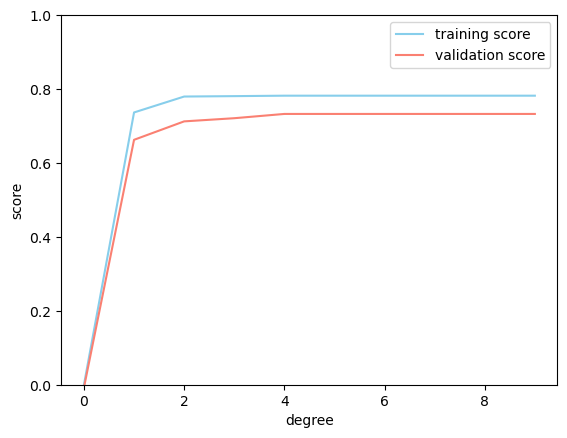

In [137]:
degree = np.arange(0, 10)

train_score, val_score = validation_curve(
    make_pipeline(PolynomialFeatures(degree, interaction_only=True),LinearRegression()), x, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=5)

plt.plot(degree, np.median(train_score, axis=1), color='skyblue', 
         label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='salmon', 
         label='validation score') 
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

better_degree = degree[np.argmax(np.median(val_score,axis=1))]
print(f'El mejor orden del polinomio es: {better_degree}')

Se seleccionó el **grado 2** como el mejor grado del polinomio, a pesar de que la curva de validación sugería un grado 4. Esto se debe a que, al utilizar el grado 4 para la regularización, el modelo no lograba converger, lo que hacía imposible obtener una solución.

Por otro lado, al analizar la gráfica, observamos que el polinomio de grado 2 mostraba una tendencia adecuada y muy similar a la esperada, además de presentar una convergencia correcta durante el entrenamiento. Por estas razones, el grado 2 se consideró la opción más apropiada.

In [192]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_poly = poly.fit_transform(x)

model = LinearRegression()

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores1 = cross_val_score(model, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error') 
scores = cross_val_score(model, x_poly, y, cv=kf, scoring='r2')

rmse_promedio_LC = -np.mean(scores1)
R2_promedio_LC = np.mean(scores)
print(f'Root Mean Squared Error promedio (RMSE): {rmse_promedio_LC}')
print(f'Coef. de Determinación promedio (R^2): {R2_promedio_LC}')

model.fit(x_poly, y)
 
feature_names = poly.get_feature_names_out(x.columns)

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model.coef_
})

print("Intercepto:", model.intercept_)
print(coef_df)
num_coef_total = len(model.coef_)
print(f'Número total de coeficientes: {num_coef_total}')
# print("Coeficientes:", model.coef_)

Root Mean Squared Error promedio (RMSE): 0.2496809668306561
Coef. de Determinación promedio (R^2): 0.7349942634438362
Intercepto: 309.6042263122626
                         feature  coefficient
0                              1     0.000000
1                      T_Max_avg   -16.500464
2                  canthiMax_avg    16.466017
3                 canthi4Max_avg   -18.015836
4                   T_RC_Max_avg     2.210682
5        T_Max_avg canthiMax_avg    -3.468743
6       T_Max_avg canthi4Max_avg     4.063301
7         T_Max_avg T_RC_Max_avg    -0.108084
8   canthiMax_avg canthi4Max_avg    -0.304305
9     canthiMax_avg T_RC_Max_avg     3.349799
10   canthi4Max_avg T_RC_Max_avg    -3.302443
Número total de coeficientes: 11


Regularización Lasso

In [ ]:
alfa = np.logspace(-3,3,num=7)
modeloL= make_pipeline(PolynomialFeatures(degree=2, interaction_only=True), LassoCV(alphas=alfa,cv=5,max_iter=10000))

scores1L = cross_val_score(modeloL, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error')
scoresL = cross_val_score(modeloL, x_poly, y, cv=kf, scoring='r2') 

rmse_promedio_LCL = -np.mean(scores1L) 
R2_promedio_LCL = np.mean(scoresL) 

print("Regularización Lasso")
print(f'Root Mean Squared Error promedio (RMSE) Lasso: {rmse_promedio_LCL}')
print(f'Coef. de Determinación promedio (R^2) Lasso:{R2_promedio_LCL}')
modeloL.fit(x_poly, y)
print("-"*20)
print("Coeficientes Lasso:", modeloL.coef_)

c:\Users\Budgie\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.903544974967414, tolerance: 0.017117874999999987
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Budgie\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.35732653234034, tolerance: 0.017117874999999987
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Budgie\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.464410621119303, tolerance: 0.017117874999999987
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Budgie\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_des

KeyboardInterrupt: 

Debido al problema de convergencia, se estandarizaron los datos pues si se aumentaban más las iteraciones no cargaba el programa. <br>
Se consultó que ***StandardScaler()*** estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1 y lo ayuda a converger.

In [167]:
modelo_lasso = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True),
    StandardScaler(),
    LassoCV(alphas=alfa, cv=5, max_iter=50000)
)

modelo_lasso.fit(x_poly, y)

rmse_scores = cross_val_score(modelo_lasso, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(modelo_lasso, x_poly, y, cv=kf, scoring='r2')

rmse_promedio_LCLS = -np.mean(rmse_scores)
r2_promedio_LCLS = np.mean(r2_scores)

print(f'RMSE promedio (Lasso): {rmse_promedio_LCLS:.3f}')
print(f'R² promedio (Lasso): {r2_promedio_LCLS:.3f}')

coeficientesL= modelo_lasso._final_estimator.coef_
print("Coeficientes Lasso:", coeficientesL)
coeficientes = modelo_lasso.named_steps['lassocv'].coef_
num_coef_cero = np.sum(coeficientes == 0)
print(f'Número de coeficientes iguales a cero: {num_coef_cero}')

num_coef_total = len(coeficientes)
print(f'Número total de coeficientes: {num_coef_total}')

RMSE promedio (Lasso): 0.255
R² promedio (Lasso): 0.723
Coeficientes Lasso: [ 0.00000000e+00  0.00000000e+00 -1.43900742e-01 -5.18987680e-01
 -1.50671706e-01 -6.06640559e-04 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -7.19721666e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.07102002e+00  2.27492595e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+

### Prueba 3: Modelo Polinomial

Definir el mejor grado

El mejor orden del polinomio es: 2


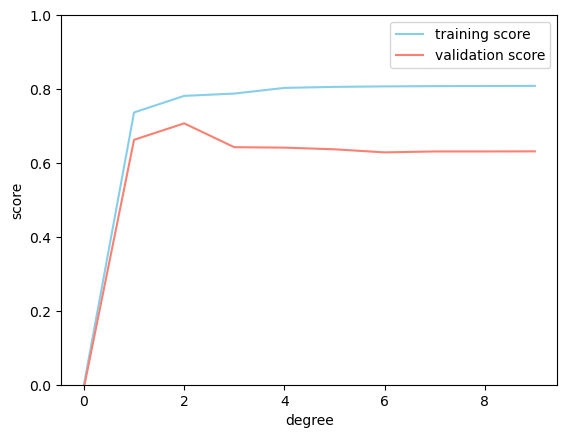

In [168]:
degree = np.arange(0, 10)

train_score, val_score = validation_curve(
    make_pipeline(PolynomialFeatures(degree, interaction_only=False),LinearRegression()), x, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=5)

plt.plot(degree, np.median(train_score, axis=1), color='skyblue', 
         label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='salmon', 
         label='validation score') 
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

better_degree = degree[np.argmax(np.median(val_score,axis=1))]
print(f'El mejor orden del polinomio es: {better_degree}')

El mejor orden del polinomio es 2

In [169]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
x_poly = poly.fit_transform(x)

model = LinearRegression()

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores1 = cross_val_score(model, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error') 
scores = cross_val_score(model, x_poly, y, cv=kf, scoring='r2')

rmse_promedio_P = -np.mean(scores1)
R2_promedio_P = np.mean(scores)
print(f'Root Mean Squared Error promedio (RMSE): {rmse_promedio_P}')
print(f'Coef. de Determinación promedio (R^2): {R2_promedio_P}')

Root Mean Squared Error promedio (RMSE): 0.25085942380453996
Coef. de Determinación promedio (R^2): 0.7311146414176102


Regularización Lasso

In [185]:
alfa = np.logspace(-3,3,num=7)
modeloL= make_pipeline(PolynomialFeatures(degree=2, interaction_only=False), LassoCV(alphas=alfa,cv=5,max_iter=10000))

scores1L = cross_val_score(modeloL, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error')
scoresL = cross_val_score(modeloL, x_poly, y, cv=kf, scoring='r2') 

rmse_promedio_PL = -np.mean(scores1L) 
R2_promedio_PL = np.mean(scoresL) 

print("Regularización Lasso")
print(f'Root Mean Squared Error promedio (RMSE) Lasso: {rmse_promedio_PL}')
print(f'Coef. de Determinación promedio (R^2) Lasso:{R2_promedio_PL}')
modeloL.fit(x_poly, y)
print("-"*20)
print("Coeficientes Lasso:", modeloL.coef_)

c:\Users\Budgie\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18911261403888346, tolerance: 0.017117874999999987
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Budgie\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.018087281204476, tolerance: 0.017117874999999987
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Budgie\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.72027521589819, tolerance: 0.017117874999999987
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Budgie\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_de

KeyboardInterrupt: 

Si se aumentaban más las iteraciones no cargaba el programa. <br>
Se volvió a utilizar ***StandardScaler()*** 

In [171]:
modelo_lasso = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=False),
    StandardScaler(),
    LassoCV(alphas=alfa, cv=5, max_iter=50000)
)

modelo_lasso.fit(x_poly, y)

rmse_scores = cross_val_score(modelo_lasso, x_poly, y, cv=kf, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(modelo_lasso, x_poly, y, cv=kf, scoring='r2')

rmse_promedio_PLS = -np.mean(rmse_scores)
r2_promedio_PLS = np.mean(r2_scores)

print(f'RMSE promedio (Lasso): {rmse_promedio_PLS:.3f}')
print(f'R² promedio (Lasso): {r2_promedio_PLS:.3f}')

coeficientesL= modelo_lasso._final_estimator.coef_
print("Coeficientes Lasso:", coeficientesL)
coeficientes = modelo_lasso.named_steps['lassocv'].coef_
num_coef_cero = np.sum(coeficientes == 0)
print(f'Número de coeficientes iguales a cero: {num_coef_cero}')
num_coef_total = len(coeficientes)
print(f'Número total de coeficientes: {num_coef_total}')

RMSE promedio (Lasso): 0.254
R² promedio (Lasso): 0.726
Coeficientes Lasso: [ 0.          0.         -0.87771754 -0.05255576 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.0023444
 -0.00383115 -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.14996533  0.          0.
  0.221

### Prueba 4: Modelo Splines

Definir el mejor nudo

La mejor cantidad de nudos es : 0


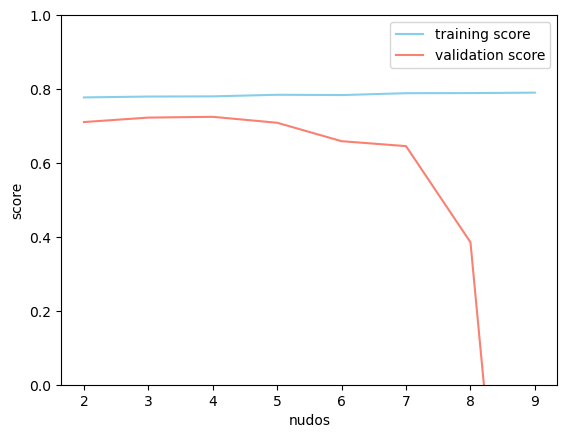

In [177]:
nudo = np.arange(0, 10)

train_score, val_score = validation_curve(
    make_pipeline(SplineTransformer(degree=2), LinearRegression()), x, y,
    param_name='splinetransformer__n_knots',
    param_range=nudo, cv=5)

plt.plot(nudo, np.median(train_score, axis=1), color='skyblue', 
         label='training score')
plt.plot(nudo, np.median(val_score, axis=1), color='salmon', 
         label='validation score') 
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('nudos')
plt.ylabel('score')

better_nudo = nudo[np.argmax(np.median(val_score,axis=1))]
print(f'La mejor cantidad de nudos es : {better_nudo}')

Se eligió la cantidad de nudos igual a 4 analizando la gráfica

In [176]:
spline_transformer = SplineTransformer(degree=2, n_knots=4)

X_splines = spline_transformer.fit_transform(x)
modelo_f = LinearRegression().fit(X_splines,y)

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores1 = cross_val_score(modelo_f, X_splines, y, cv=kf, scoring='neg_root_mean_squared_error') 
scores = cross_val_score(modelo_f, X_splines, y, cv=kf, scoring='r2')

rmse_promedio_S = -np.mean(scores1)
R2_promedio_S = np.mean(scores)
print(f'Root Mean Squared Error promedio (RMSE): {rmse_promedio_S}')
print(f'Coef. de Determinación promedio (R^2): {R2_promedio_S}')

Root Mean Squared Error promedio (RMSE): 0.25158192028902504
Coef. de Determinación promedio (R^2): 0.7326306445914439


Regularización Lasso

In [179]:
alfa = np.logspace(-3,3,num=7)
modeloSL= make_pipeline(SplineTransformer(degree=2), LassoCV(alphas=alfa, cv=5, max_iter=50000))

scores1L = cross_val_score(modeloSL, X_splines, y, cv=kf, scoring='neg_root_mean_squared_error')
scoresL = cross_val_score(modeloSL, X_splines, y, cv=kf, scoring='r2') 

rmse_promedio_SL = -np.mean(scores1L) 
R2_promedio_SL = np.mean(scoresL) 

print("Regularización Lasso")
print(f'Root Mean Squared Error promedio (RMSE) Lasso: {rmse_promedio_SL}')
print(f'Coef. de Determinación promedio (R^2) Lasso:{R2_promedio_SL}')
modeloSL.fit(X_splines, y)


coeficientesL= modeloSL._final_estimator.coef_
print("Coeficientes Lasso:", coeficientesL)
coeficientes = modeloSL.named_steps['lassocv'].coef_
num_coef_cero = np.sum(coeficientes == 0)
print(f'Número de coeficientes iguales a cero: {num_coef_cero}')
num_coef_total = len(coeficientes)
print(f'Número total de coeficientes: {num_coef_total}')

Regularización Lasso
Root Mean Squared Error promedio (RMSE) Lasso: 0.2512593855183157
Coef. de Determinación promedio (R^2) Lasso:0.7360209450252132
Coeficientes Lasso: [ 8.47952630e-01  6.31566909e-02 -1.58272908e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.30259022e+00  0.00000000e+00
  0.00000000e+00 -2.06878063e-01 -1.82442866e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -9.74993070e-01 -0.00000000e+00
 -0.00000000e+00  1.78908061e-01  9.69394626e-03  0.00000000e+00
 -1.47646172e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  

### Tabla de métricas de todos los modelos

Para poder elegir el mejor modelo

In [184]:
resultados = [
    {"Modelo": "Lineal múltiple", 
     "RMSE": rmse_promedio_LS, 
     "R²": R2_promedio_LS},

    {"Modelo": "Lasso (lineal)", 
     "RMSE": rmse_promedio_LSL, 
     "R²": R2_promedio_LSL},

    {"Modelo": "Lineal con interacciones", 
     "RMSE": rmse_promedio_LC, 
     "R²": R2_promedio_LC},

    {"Modelo": "Lasso con interacciones", 
     "RMSE": rmse_promedio_LCLS, 
     "R²": r2_promedio_LCLS},

    {"Modelo": "Polinomial", 
     "RMSE": rmse_promedio_P, 
     "R²": R2_promedio_P},

    {"Modelo": "Lasso polinomial", 
     "RMSE": rmse_promedio_PLS, 
     "R²": r2_promedio_PLS},

    {"Modelo": "Splines", 
     "RMSE": rmse_promedio_S, 
     "R²": R2_promedio_S},

    {"Modelo": "Lasso splines", 
     "RMSE": rmse_promedio_SL, 
     "R²": R2_promedio_SL},
]

tabla = pd.DataFrame(resultados)
styled = (
    tabla.style
    .apply(
        lambda fila: ['background-color: white; color: black'] * len(fila)
        if fila.name == 7 else [''] * len(fila),
        axis=1
    )
    .format({"RMSE": "{:.4f}", "R²": "{:.4f}"})
    .set_table_styles([

        {"selector": "th.col_heading.level0.col0",
         "props": [("background-color", "salmon"),
                   ("color", "white"),
                   ("font-weight", "bold")]},

        {"selector": "th.col_heading.level0.col1",
         "props": [("background-color", "skyblue"),
                   ("color", "black"),
                   ("font-weight", "bold")]},

        {"selector": "th.col_heading.level0.col2",
         "props": [("background-color", "skyblue"),
                   ("color", "black"),
                   ("font-weight", "bold")]},
    ])
)
styled

,Modelo,RMSE,R²
0,Lineal múltiple,0.2692,0.6944
1,Lasso (lineal),0.2689,0.6952
2,Lineal con interacciones,0.2497,0.7350
3,Lasso con interacciones,0.2555,0.7227
4,Polinomial,0.2509,0.7311
5,Lasso polinomial,0.2542,0.7256
6,Splines,0.2516,0.7326
7,Lasso splines,0.2513,0.7360


***

### Conclusión final

Seleccionamos el **modelo lineal con interacciones** como el mejor modelo. A pesar de que el modelo basado en splines con regularización Lasso obtuvo un desempeño ligeramente superior, con un R²=0.7360, su funcionamiento es considerablemente más complejo. En contraste, el modelo lineal con interacciones alcanzó un R²=0.7350, un valor prácticamente equivalente, pero mucho más simple, interpretable y fácil de implementar.
Por esta razón, priorizamos el modelo lineal con interacciones, ya que ofrece un buen equilibrio entre rendimiento y baja complejidad, manteniendo una precisión comparable mientras mantiene la interpretabilidad del modelo.

No se utilizó **curva de aprendizaje** para ningún modelo ya que no requerimos cambiar la cantidad de datos. No podemos aumentarlos y tampoco mejoraría al modelo bajarlos.

***

### Ecuación del modelo

\[
\begin{align*}
\mathbf{aveOralM} = & \; 309.6 \\
& - 16.5 \cdot \mathbf{T\_Max\_avg} \\
& + 16.47 \cdot \mathbf{canthiMax\_avg} \\
& - 18.02 \cdot \mathbf{canthi4Max\_avg} \\
& + 2.21 \cdot \mathbf{T\_RC\_Max\_avg} \\
& - 3.47 \cdot (\mathbf{T\_Max\_avg} \cdot \mathbf{canthiMax\_avg}) \\
& + 4.06 \cdot (\mathbf{T\_Max\_avg} \cdot \mathbf{canthi4Max\_avg}) \\
& - 0.10 \cdot (\mathbf{T\_Max\_avg} \cdot \mathbf{T\_RC\_Max\_avg}) \\
& - 0.30 \cdot (\mathbf{canthiMax\_avg} \cdot \mathbf{canthi4Max\_avg}) \\
& + 3.35 \cdot (\mathbf{canthiMax\_avg} \cdot \mathbf{T\_RC\_Max\_avg}) \\
& - 3.30 \cdot (\mathbf{canthi4Max\_avg} \cdot \mathbf{T\_RC\_Max\_avg})
\end{align*}
\]

***

# Parte 2: Clasificación (50%)

Cargar datos

In [ ]:
df = pd.read_csv("")